# GNR -- Gandhi, Navarro, Rivers

# Summary of the GNR method: 

Derivation of the model: 

The firm's profit maximization problem with respect to intermediate inpouts is: 

$$
\max_{M_{jt}} P_t \mathbb E\left[F(k_{jt}, l_{jt}, m_{jt})e^{\omega_{jt}+ \epsilon_{jt}}\right] - \rho_t M_{jt}. 
$$

and the first-order condition is: 

$$
P_t \frac{\partial}{\partial M_{jt}}F(k_{jt}, l_{jt}, m_{jt})e^{\omega_{jt}} \mathcal E = \rho_t . 
$$

with $\mathcal E \equiv e^{\epsilon_{jt}}$. Take Logs: 

$$
\ln P_t +\ln\left(\frac{\partial}{\partial M_{jt}}F(k_{jt}, l_{jt}, m_{jt})\right) + {\omega_{jt}} + \ln \mathcal E = \ln \rho_t . 
$$

Now subtract $\ln Y_{jt} = \ln F(k_{jt}, l_{jt}, m_{jt}) + {\omega_{jt}} + \epsilon_{jt}$  from both sides

$$
\ln \mathcal E +\ln\left(\frac{\partial}{\partial M_{jt}}F(k_{jt}, l_{jt}, m_{jt})\right) - {\epsilon_{jt}}  = \ln \rho_t  - \ln P_t - \ln Y_{jt} + \ln F(k_{jt}, l_{jt}, m_{jt}) \equiv \ln \left(\frac{\rho_tF(k_{jt}, l_{jt}, m_{jt})}{P_tY_{jt}}\right). 
$$

Using the properties of log derivatives (where lowercase = logs)

$$
\ln\left(\frac{\partial}{\partial M_{jt}}F(k_{jt}, l_{jt}, m_{jt})\right) \equiv \ln\left(\frac{\partial}{\partial m_{jt}}f(k_{jt}, l_{jt}, m_{jt}) \cdot \frac{F(k_{jt}, l_{jt}, m_{jt})}{M_t}\right)
$$

Then moving the $\frac{F(k_{jt}, l_{jt}, m_{jt})}{M_t}$ to the other side we get


$$
\underbrace{\ln \mathcal E +\ln\left(\frac{\partial}{\partial m_{jt}}f(k_{jt}, l_{jt}, m_{jt})\right)}_{\ln D^\mathcal E} - {\epsilon_{jt}}  =  \ln \left(\frac{\rho_t M_{jt}}{P_tY_{jt}}\right),
$$ 

$$
{\ln D^\mathcal E}(k_{jt}, l_{jt}, m_{jt}) - {\epsilon_{jt}}  =  \ln \left(\frac{\rho_t M_{jt}}{P_tY_{jt}}\right) \equiv s_{jt},
$$ 

where $s_{jt}$ is the log intermediate share of output. 

## Estimation Procedure

First, we want to estimate the elasticity $D^{\mathcal E}(k_{jt}, l_{jt}, m_{jt}) = \operatorname{PolynomialFit}(k_{jt}, l_{jt}, m_{jt})$. To find the coefficients of the polynomials, we run the estimator 

$$
\min_{\gamma'} \sum_{j, t} \left\{  s_{jt} - \ln\underbrace{\begin{pmatrix} \gamma_0'+\gamma_k'k_{jt}+\gamma_l'l_{jt}+ \gamma_m' m_{jt} + \gamma_{kk}' k_{jt}^2 + \gamma_{ll}' l_{jt}^2 \\ \gamma_{mm}' m_{jt}^2 + \gamma_{kl}' k_{jt}l_{jt} + \gamma_{km}' k_{jt} m_{jt} + \gamma'_{lm} l_{jt} m_{jt}\end{pmatrix}}_{D^\mathcal E} \right\}^2
$$

where $s_{jt} \equiv \ln\left(\frac{\rho_t M_{jt}}{P_t Y_t}\right)$ is the log intermediate share of input. Then using the gamma coefficients, we get

$$\hat D_{jt} \equiv D^{\mathcal E}(k_{jt}, l_{jt}, m_{jt}) = \operatorname{Polynomial}(k_{jt}, l_{jt}, m_{jt} \big| \vec \gamma')$$

From there, get the residuals

$$ 
\hat \epsilon_{jt} =  \ln \hat D_{jt} - s_{jt}
$$


Next, estimate $\widehat{\mathcal E} = \frac{1}{JT}\sum_{j,t}e^{\hat \epsilon_{jt}}$. Then using

$$
\ln \hat D_{jt}^{\mathcal E} = \ln \hat{\mathcal E} + \ln \left(\frac{\partial}{\partial m_{jt}} f_{jt}\right)
$$

$$
\hat D_{jt}^{\mathcal E} \cdot \frac{1}{\hat{\mathcal E}} = \frac{\partial}{\partial m_{jt}} f_{jt}
$$

$$
\hat X_\text{poly} \cdot \frac{\vec \gamma'}{\hat{\mathcal E}} = \frac{\partial}{\partial m_{jt}} f_{jt}
$$

That is, we can use the same polynomial design matrixed used to estimate $\hat D_{jt}^{\mathcal E}$, but just divide the gamma coefficients by $\widehat{\mathcal E}$, to get the $\frac{\partial}{\partial m_{jt}} f_{jt}$.

### Integral:

Next we want to recover the constant of integration in 

$$
\int \frac{\partial}{\partial m_{jt}} f(k_{jt}, l_{jt}, m_{jt}) dm_{jt} = f(k_{jt}, l_{jt}, m_{jt}) + \mathcal C(k_{jt}, l_{jt})
$$

This amounts to integrating the polynomial using $\gamma = \gamma'/\hat {\mathcal E}$.


$$
\text{integral} = \mathcal D(k_{jt}, l_{jt}, m_{jt}) =   \begin{pmatrix} \gamma_0+\gamma_k k_{jt}+\gamma_l l_{jt}+ \frac{\gamma_m}{2} m_{jt} + \gamma_{kk} k_{jt}^2 + \gamma_{ll} l_{jt}^2 \\ \frac{\gamma_{mm}}{3} m_{jt}^2 + \gamma_{kl} k_{jt}l_{jt} + \frac{\gamma_{km}}{2} k_{jt} m_{jt} + \frac{\gamma_{lm}}{2} l_{jt} m_{jt}\end{pmatrix} m_{jt}
$$

Using the above $\mathcal D$, we can calulate $\mathcal Y_{jt} \equiv y_{jt} - \epsilon_{jt} - \mathcal D_{jt} = - \mathcal C(k_{jt}, l_{jt}) + \omega_{jt}$

$$
\hat{\mathcal{Y}}_{jt} = \ln \left( \frac{Y_{jt}}{e^{\hat{\epsilon}_{jt}} e^{\hat{\mathcal{D}}_{jt}}} \right)
$$


### Constant of Integration:
We approximate $\omega$ with a function $h(\cdot)$: 
$$
\mathcal{Y}_{j t}=-\mathscr{C}\left(k_{j t}, l_{j t}\right)+h\left(\mathcal{Y}_{j t-1}+\mathscr{C}\left(k_{j t-1}, l_{j t-1}\right)\right)+\eta_{j t} .
$$
In this case we use 
$$\mathcal C({k_{jt}, l_{jt}}) = \operatorname{PolynomialFit}(k_{jt}, l_{jt}, \text{degree}_C)$$
$$\mathcal h_A(\omega_{jt-1}) = \operatorname{PolynomialFit}(\omega_{jt-1}, \text{degree}_\omega) = \operatorname{PolynomialFit}(\mathcal Y_{jt-1} + \mathcal C({k_{jt-1}, l_{jt-1}})), \text{degree}_\omega) + \eta_{jt}$$

All together, 

$$
\hat{\mathcal{Y}}_{j t}=-\sum_{0<\tau_k+\tau_l \leq \tau} \alpha_{\tau_k, \tau_l} k_{j t}^{\tau_k} l_{j t}^{\tau_l}+\sum_{0 \leq a \leq A} \delta_a\left(\hat{\mathcal{Y}}_{j t-1}+\sum_{0<\tau_k+\tau_l \leq \tau} \alpha_{\tau_k, \tau_l} k_{j t-1}^{\tau_k} l_{j t-1}^{\tau_l}\right)^a+\eta_{j t} .
$$


The moments to estimate are: 

$$
\begin{aligned}
(i) \quad E\left[\varepsilon_{j t} \frac{\partial \ln D_r\left(k_{j t}, l_{j t}, m_{j t}\right)}{\partial \gamma}\right] & =0 \\
(ii) \quad E\left[\eta_{j t} k_{j t}^{\tau_k} l_{j t}^{\tau_t}\right] & =0, \\
(iii) \quad E\left[\eta_{j t} \mathcal{Y}_{j t-1}^a\right] & =0,
\end{aligned}
$$

We can "concentrate out" (i) by running the nonlinear least squares regression of of the share equation $s_{jt}$ on $\ln D_{jt}$. 

We can concentrate out (iii) with the following procedure: 
* Guess $\alpha$
* Calculate $\hat\omega_{jt} = \hat{\mathcal Y_{jt}} + \operatorname{Poly}^\alpha \left( \omega_{jt-1}(\alpha)\right)$, plugging in the guessed regression coeficients $\alpha$ and multiplying them with the polynomial design matrix to get the predicted omega.  
* Polynomial-regress $\hat\omega_{jt} \sim \hat\omega_{jt-1}$ to get the innovation $\hat\eta_{jt}$
* Use the moments $\mathbb E\left[ \hat\eta_{jt} X_{jt} \right] = 0$ for all $X\in \left[k, l, k^2, l^2, kl, ..., \text{higher order polynomial terms}\right]$. 

So, we will have as many moments as terms in the polynomial regression. 

Now we have $\alpha$, which lets us recover the constant of integration, and we have $\delta$ (which is just the regression coefficients from regression $\omega$ on the polynomial of lagged $\omega$, which lets us recover the productivity $\omega_{jt}$. 
The production function is nonparametrically identified by 
$$
f(k_{jt}, l_{jt}, m_{jt}) = \mathcal D_{jt} - \mathcal C_{jt}
$$
that is, it's equal to the "integral" minus the "constant of integration."

# Load in the data


In [184]:
import autograd.numpy as np
from autograd import grad, hessian
#import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from itertools import combinations_with_replacement, chain

In [185]:
filename = "../PS3_data_changedtoxlsx.xlsx"
df0 = pd.read_excel(filename)
#Remove missing materials columns
df = df0[['year', 'firm_id', 'X03', 'X04', 'X05', 'X16', 'X40', 'X43', 'X44', 'X45', 'X49']]
#new_names = ["year", "firm_id", "obs", "ly", "s01", "s02", "lc", "ll", "lm"]
new_names = ["t", "firm_id", "y_gross", "s01", "s02", "s13", "k", "l", "m", 'py', 'pm']
df.columns = new_names
#Drop missing materials data
df=df[df['m']!=0]
#Keep industry 1 only
df=df[df['s13']==1]

#Creating value-added y
df['y'] = df['y_gross']
#Creating the intermeidate share of output cost variable: emember everything is already in logs 
#df['s'] = np.log(np.exp(df['pm'])*np.exp(df['m']))/(np.exp(df['py'])*np.exp(df['y']))
df['s'] = df['pm']+df['m'] - df['py'] - df['y']
#Creating lagged variables
df = df.sort_values(by=['firm_id', 't'])
df['kprev'] = df.groupby('firm_id')['k'].shift(1)
df['lprev'] = df.groupby('firm_id')['l'].shift(1)
df['mprev'] = df.groupby('firm_id')['m'].shift(1)

In [186]:
def poly_terms(n_features, degree):
    #This thing creates an iterator structure of tuples, used to create polynomial interaction terms. 
    #It looks something like this: (0,), (1,), (2,), (0, 0), (0, 1) 
    polynomial_terms = chain(
        *(combinations_with_replacement(range(n_features), d) for d in range(1, degree+1))
    )
    return(polynomial_terms)

def poly_design_matrix(xvars, degree):
    #Get number of observations (n) and number of independent variables (k)
    if xvars.ndim == 1:
        xvars = xvars.reshape(1, -1)
    # Get the number of samples (n) and number of features (m) from X
    n_samples, n_features = xvars.shape
    # Start with a column of ones for the intercept term
    X_poly = np.ones((n_samples, 1))
    #Create iterator used to construct polynomial terms
    polynomial_terms = poly_terms(n_features, degree)
    # Generate polynomial terms and interaction terms up to 4th degree
    for terms in  polynomial_terms:  # For degrees 1 to 4
            X_poly = np.hstack((X_poly, np.prod(xvars[:, terms], axis=1).reshape(-1, 1)))
    # Compute the coefficients using the normal equation: beta = (X.T * X)^(-1) * X.T * y
    return X_poly

#Function for finding the nonlinear least squares objective function 
def nlls_share_obj(gamma, X_poly, s):
    #gamma is the vector of coefficients
    #X_poly is the design matrix containing all of the polynomial coefficients
    #Check of X_poly@gamma is negative, if so, make it small 
    epsilon = 1e-16
    Dhat = X_poly@gamma
    
    #Autograd does not like in-place modification. Use np.where to set negative elements to a small number
    Dhat = np.where(Dhat <= epsilon, epsilon, Dhat)
    
    #print(min(Dhat))
    #Evaluate the objective
    obj = np.sum((s - np.log(Dhat))**2) #/(X_poly.shape[0])
    return obj

# First step of coding: Fit $D$. 

$$
\min_{\gamma'} \sum_{j, t} \left\{  s_{jt} - \ln\underbrace{\begin{pmatrix} \gamma_0'+\gamma_k'k_{jt}+\gamma_l'l_{jt}+ \gamma_m' m_{jt} + \gamma_{kk}' k_{jt}^2 + \gamma_{ll}' l_{jt}^2 \\ \gamma_{mm}' m_{jt}^2 + \gamma_{kl}' k_{jt}l_{jt} + \gamma_{km}' k_{jt} m_{jt} + \gamma'_{lm} l_{jt} m_{jt}\end{pmatrix}}_{D^\mathcal E} \right\}^2
$$


In [189]:
degree= 1
#Make the polynomial design matrix
xvars = df[['k', 'l', 'm']].to_numpy()
s = df[['s']].to_numpy()
X_poly_D = poly_design_matrix(xvars, degree)
#calculate the gradient of the objective function using AutoGrad
autogradient_nlls = grad(nlls_share_obj)
autohessian_nlls = hessian(nlls_share_obj)
#initial guess
#gammaprime0 = np.array([1, 1, 1, 1])
#ammaprime0 = 
#lls_share_obj(gammaprime0, X_poly_D, s)
#_poly_D@gammaprime0

es = np.exp(s)

gammaprime_linear_reg = np.linalg.solve(X_poly_D.T@X_poly_D, X_poly_D.T@es)

eshat = X_poly_D@gammaprime_linear_reg

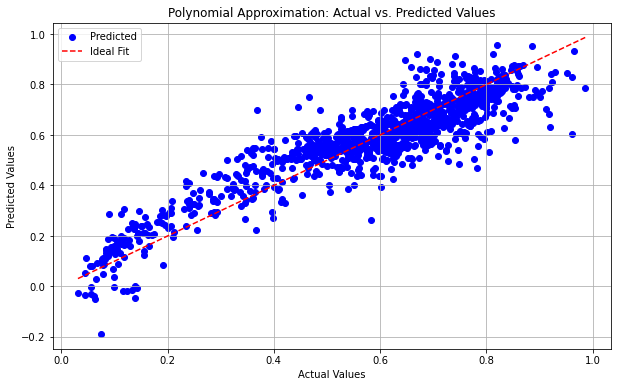

In [190]:
# Example data (replace these with your actual y and yhat values)
# Create a scatter plot for actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(es, eshat, color='blue', label='Predicted', marker='o')
plt.plot([min(es), max(es)], [min(es), max(es)], color='red', linestyle='--', label='Ideal Fit')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Approximation: Actual vs. Predicted Values')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Try Gauss-Newton method

Use the lstsq function, or look into the jaxopt package

In [191]:
#minimize to fit the coefficients gammaprime 

#gammaprime_results = opt.minimize(nlls_share_obj, gammaprime0, args=(X_poly_D, s),
#                       tol=1e-12, method='Nelder-Mead',                              
#                        options={'maxiter': 2000},
#)

gammaprime0 = gammaprime_linear_reg.flatten()

gammaprime_results = opt.minimize(nlls_share_obj, gammaprime0, args=(X_poly_D, s),
                       tol=1e-12, jac=autogradient_nlls, hess = autohessian_nlls, method='Newton-CG'
)

#gammaprime_results = opt.minimize(nlls_share_obj, gammaprime0, args=(X_poly_D, s),
#                       tol=1e-12, jac=autogradient_nlls, method='L-BFGS-B',                              
#                        options={'ftol': 1e-12, 'gtol': 1e-12, 'maxiter': 2000},
#)

print("The error is:",  gammaprime_results.fun)
print("The coefficients in the degree-1 fit are:",  gammaprime_results.x)

shat = np.log(X_poly_D@gammaprime_results.x)

The error is: 436767.6011772232
The coefficients in the degree-1 fit are: [ 5.22113082e-01 -6.83052422e-18 -3.45100961e-17  3.73017758e-17]


## Actual by predicted plot for my polynomial approximation of $\Phi$, run on the entire sample

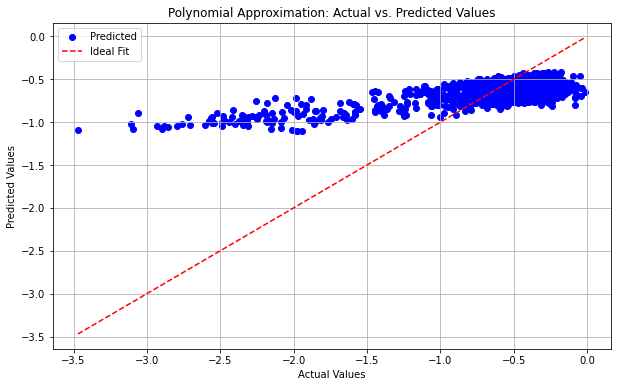

In [183]:
# Example data (replace these with your actual y and yhat values)
# Create a scatter plot for actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(s, shat, color='blue', label='Predicted', marker='o')
plt.plot([min(s), max(s)], [min(s), max(s)], color='red', linestyle='--', label='Ideal Fit')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Approximation: Actual vs. Predicted Values')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [41]:
#phi_beta_dict = fit_phi_poly_years(df, degree)
df["Phi"] = Phi
#Add into the dataframe
df['Phiprev'] = df.groupby('firm_id')['Phi'].shift(1)
#drop NaNs

Now, we've calculated Phi and its lagged value. 
## Next step: "Concentrate out" additional moments

let 

$$
\widehat{\tilde\beta_0 + \omega_{it}(\beta_k, \beta_l)} = \hat{\tilde \Phi_t}(k_{it}, l_{it}, m_{it}) - \beta_k k_{it} - \beta_l l_{it}
$$

Then regress $\widehat{\tilde\beta_0 + \omega_{it}(\beta_k, \beta_l)}$ on $\widehat{\tilde\beta_0 + \omega_{it-1}(\beta_k, \beta_l})$, noting that the residuals of this regression are the implied values of the innovations in omega, that is, $\hat \xi_{it}(\beta_k, \beta_l).$

Notice that this regression implicitly makes these innovations mean zero and uncorrelated with $\omega_{it-1}(\beta_k, \beta_l)$, so it is similar to enforcing the first and fourth moments in the "four moments" version of this etimation. 

Then, search over $\beta_k$ and $\beta_l$ to satisfy the moment conditions: 

$$
E\left[ \hat \xi_{it}(\beta_k, \beta_l) \otimes \begin{pmatrix}k_{it} \\ l_{it-1}\end{pmatrix} \right] = 0. 
$$



In [88]:
#Calculates the error term, h(theta, y, k, l)
def moment_error_ACF(theta, y, k, l, kprev, lprev, Phi, Phiprev):
    #get the innovations to omega
    beta_k = theta[0]
    beta_l = theta[1]
    b0_plus_omega = Phi - beta_k*k - beta_l*l 
    b0_plus_omega_prev = Phiprev - beta_k*kprev - beta_l*lprev 
    #Regress them to get the innovations
    yvar = b0_plus_omega#.reshape(-1, 1)
    xvar = b0_plus_omega_prev.reshape(-1, 1)
    
    omega_degree = 1
    
    coeffs = fit_phi_poly(yvar, xvar, degree = omega_degree)
    #evaluate
    b0_plus_omega_hat = eval_phi_poly(xvar, degree=omega_degree, beta=coeffs)
    #Get residual
    xi = b0_plus_omega -  b0_plus_omega_hat
    #xi = fit_phi_poly(df['b0_plus_omega'].to_numpy().reshape(1, -1), df['b0_plus_omega'].to_numpy().reshape(1, -1), degree=1)
    #remove nans (associated with the lag) -- this is ok because we're just using this vector as part of a dot product. 
    return xi, coeffs[1]

def moment_ex_restrictions_ACF(k, lprev):
    #Moment conditions include exogeneity restrictions for 1, k_{it}, l_{it-1}, and Phi. 
    #Put them all in one matrix for easy access, called Vexc (short for vectors for exogeneity restrictions)
    #Replace all nans with zeros -- this is ok, because we're just taking a dot product over each row of this matrix, and want to remove the nans
    Vex = np.vstack([
        k, 
        lprev])
    return Vex

def gmm_obj_ACF(theta, y, k, l, kprev, lprev, Phi, Phiprev, Vex, W):
    #Arguments
    #Get the vector h(theta, y, k, l)
    xi = moment_error_ACF(theta, y, k, l, kprev, lprev, Phi, Phiprev)[0]
    #Calculate the "error" -- exogenous terms (dotproduct) h(theta, y, k, l)
    err = Vex@xi
    #Calculate the weighted sum of the error using the weight matrix, W
    obj = err.T@W@err
    return obj

## Quick test -- evaluating the GMM objective function at $\theta = \mathbf 1$. 

In [89]:
df_nonans = df.dropna()
#df_nonans = df.copy()
#df_nonans.loc[df_nonans.isnull().any(axis=1)] = 0

#Get all the variables out of the dataframe -- This allows me to use Autograd
y = df_nonans['y'].to_numpy() 
k = df_nonans['k'].to_numpy()  
l = df_nonans['l'].to_numpy()  
Phi = df_nonans['Phi'].to_numpy() 
kprev = df_nonans['kprev'].to_numpy()  
lprev = df_nonans['lprev'].to_numpy() 
Phiprev = df_nonans['Phiprev'].to_numpy() 
#Run GMM
#Initial guess for parameters beta_0, beta_k, beta_l, rho
theta0 = np.array([1,1])
#Weight matrix -- use the identity for now. 
W0 = np.eye(2)
#(2) Get matrix of variables used in exogeneity restrictions
Vex = moment_ex_restrictions_ACF(k, lprev)
#Evaluate the GMM error
obj = gmm_obj_ACF(theta0, y, k, l, kprev, lprev, Phi, Phiprev, Vex, W0)
obj

#Create  automatic gradient
autogradient = grad(gmm_obj_ACF)

#
xi = moment_error_ACF(theta, y, k, l, kprev, lprev, Phi, Phiprev)[0]

NameError: name 'df' is not defined

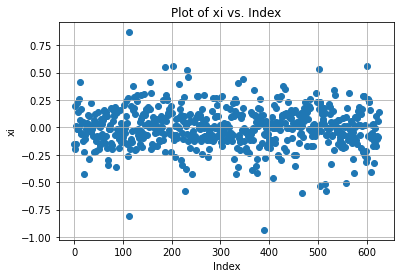

In [69]:
plt.scatter(range(len(xi)), xi, marker='o', linestyle='-')
plt.xlabel("Index")
plt.ylabel("xi")
plt.title("Plot of xi vs. Index")
plt.grid(True)
plt.show()

## Now, use a minimization routine to optimize for theta. 

In [86]:
theta0 = np.array([1, 1])/2
bounds = [(-0.5, 2), (-0.5, 2)]

#theta0 = np.array([0.5, 1.6])

#Weight matrix -- use the identity for now. 
W0 = np.eye(2)
#(2) Get matrix of variables used in exogeneity restrictions
Vex = moment_ex_restrictions_ACF(k, lprev)

gmm_args = (y, k, l, kprev, lprev, Phi, Phiprev, Vex, W0)


theta_results = opt.minimize(gmm_obj_ACF, theta0, args=gmm_args,
                        tol=1e-16, method='Nelder-Mead', options={'maxiter': 2000}, 
                             bounds = bounds)

theta_results_grad = opt.minimize(gmm_obj_ACF, theta0, args=gmm_args,
                       tol=1e-16, jac=autogradient, method='L-BFGS-B',                              
                        options={'ftol': 1e-10, 'gtol': 1e-10, 'maxiter': 2000},
)

#autogradient(theta_results, *gmm_args)

theta=theta_results.x
#Get the slope, rho. It's the slope of the regression used to find the moments. 
rho = moment_error_ACF(theta, y, k, l, kprev, lprev, Phi, Phiprev)[1]

print("The GMM error is:", gmm_obj_ACF(theta, y, k, l, kprev, lprev, Phi, Phiprev, Vex, W0))
print("The estimates using Nelder-Mead are: [beta_k, beta_l] = ", theta)
print("The slope of the AR(1) of productivity is: rho = ", rho)
print("The estimates using autograd: [beta_k, beta_l] = ", theta_results_grad.x)


The GMM error is: 2.1218614496090376e-16
The estimates using Nelder-Mead are: [beta_k, beta_l] =  [0.46845648 0.59230075]
The slope of the AR(1) of productivity is: rho =  0.3981235469618696
The estimates using autograd: [beta_k, beta_l] =  [0.46845648 0.59230075]


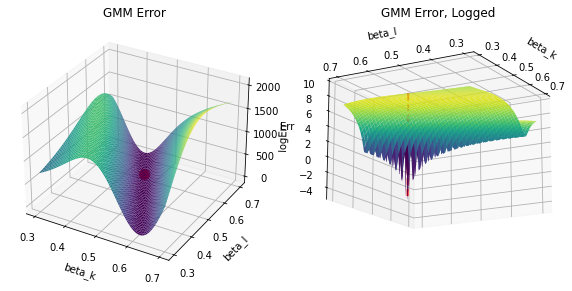

In [87]:
#plotrange = np.linspace(-1, 10, 300)
plotrange = np.linspace(0.3, 0.7, 300)
# Define the grid over which to plot
theta_grid1 = plotrange
theta_grid2 = plotrange
TH1, TH2 = np.meshgrid(theta_grid1, theta_grid2)

# Define the function to plot
# Calculate Z values using a for loop
Z0 = np.zeros_like(TH1)
for i in range(TH1.shape[0]):
    for j in range(TH1.shape[1]):
        TH = np.array([TH1[i, j], TH2[i, j]])
        Z0[i, j] = gmm_obj_ACF(TH, y, k, l, kprev, lprev, Phi, Phiprev, Vex, W0 )

Zlog = np.log(Z0)
Z = Z0

#Our estimated value
x0, y0 = theta_results.x[0], theta_results.x[1]  
z0 = gmm_obj_ACF(np.array([x0, y0]), y, k, l, kprev, lprev, Phi, Phiprev, Vex, W0 )

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')  # Second subplot for logged


# Plot the unlogged surface
surf1 = ax1.plot_surface(TH1, TH2, Z, cmap='viridis')
#fig.colorbar(surf1, ax=ax1, shrink=0.2, aspect=5)
ax1.set_xlabel('beta_k')
ax1.set_ylabel('beta_l')
ax1.set_zlabel('Err')
ax1.set_title('GMM Error')

# Plot the logged surface
surf2 = ax2.plot_surface(TH1, TH2, Zlog, cmap='viridis')
#fig.colorbar(surf2, ax=ax2, shrink=0.2, aspect=5)
ax2.set_xlabel('beta_k')
ax2.set_ylabel('beta_l')
ax2.set_zlabel('logErr')
ax2.set_title('GMM Error, Logged')
# Draw a vertical line from the surface point down to z=0
ax2.plot([x0, x0], [y0, y0], [-4, 10], color='red', linewidth=2, linestyle='--')
# Plot the surface
# Draw a vertical line from the surface point down to z=0
ax1.scatter(x0, y0, z0, color='red', s=100, marker='o')
#ax2.scatter(x0, y0, z0, color='red', s=100, marker='o')

# Set labels
#ax2.set_zscale('log')

#x1.view_init(elev=0, azim=200)  # Adjust azim to rotate right
ax2.view_init(elev=-15, azim=-150)  # Adjust azim to rotate right


plt.show()



## The surface is very flat and difficult to find an optimum over. I think the spikes in the log plot are due to numerical error. 
But, it looks like we got roughly close to the optimum. 

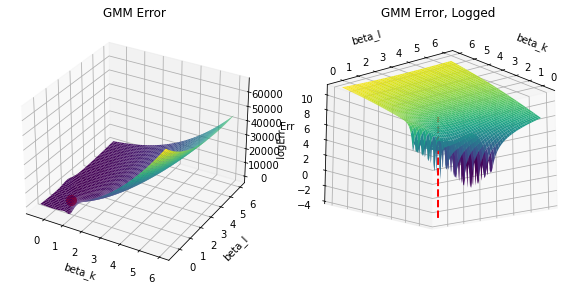

In [32]:
plotrange = np.linspace(-0.5, 6, 300)
#plotrange = np.linspace(0.3, 0.7, 300)
# Define the grid over which to plot
theta_grid1 = plotrange
theta_grid2 = plotrange
TH1, TH2 = np.meshgrid(theta_grid1, theta_grid2)

# Define the function to plot
# Calculate Z values using a for loop
Z0 = np.zeros_like(TH1)
for i in range(TH1.shape[0]):
    for j in range(TH1.shape[1]):
        TH = np.array([TH1[i, j], TH2[i, j]])
        Z0[i, j] = gmm_obj_ACF(TH, y, k, l, kprev, lprev, Phi, Phiprev, Vex, W0 )

Zlog = np.log(Z0)
Z = Z0

#Our estimated value
x0, y0 = theta_results.x[0], theta_results.x[1]  
z0 = gmm_obj_ACF(np.array([x0, y0]), y, k, l, kprev, lprev, Phi, Phiprev, Vex, W0 )

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')  # Second subplot for logged


# Plot the unlogged surface
surf1 = ax1.plot_surface(TH1, TH2, Z, cmap='viridis')
#fig.colorbar(surf1, ax=ax1, shrink=0.2, aspect=5)
ax1.set_xlabel('beta_k')
ax1.set_ylabel('beta_l')
ax1.set_zlabel('Err')
ax1.set_title('GMM Error')

# Plot the logged surface
surf2 = ax2.plot_surface(TH1, TH2, Zlog, cmap='viridis')
#fig.colorbar(surf2, ax=ax2, shrink=0.2, aspect=5)
ax2.set_xlabel('beta_k')
ax2.set_ylabel('beta_l')
ax2.set_zlabel('logErr')
ax2.set_title('GMM Error, Logged')
# Draw a vertical line from the surface point down to z=0
ax2.plot([x0, x0], [y0, y0], [-4, 10], color='red', linewidth=2, linestyle='--')
# Plot the surface
# Draw a vertical line from the surface point down to z=0
ax1.scatter(x0, y0, z0, color='red', s=100, marker='o')
#ax2.scatter(x0, y0, np.log(z0), color='red', s=100, marker='o')

# Set labels
#ax.set_zscale('log')

#x1.view_init(elev=0, azim=200)  # Adjust azim to rotate right
ax2.view_init(elev=-15, azim=-320)  # Adjust azim to rotate right
plt.show()

# Plotting over a wider range, it looks like there are two (or more) local optimums. 